<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Walmart_logo.svg/1200px-Walmart_logo.svg.png" alt="" style="display: block; margin: auto;">
</div>


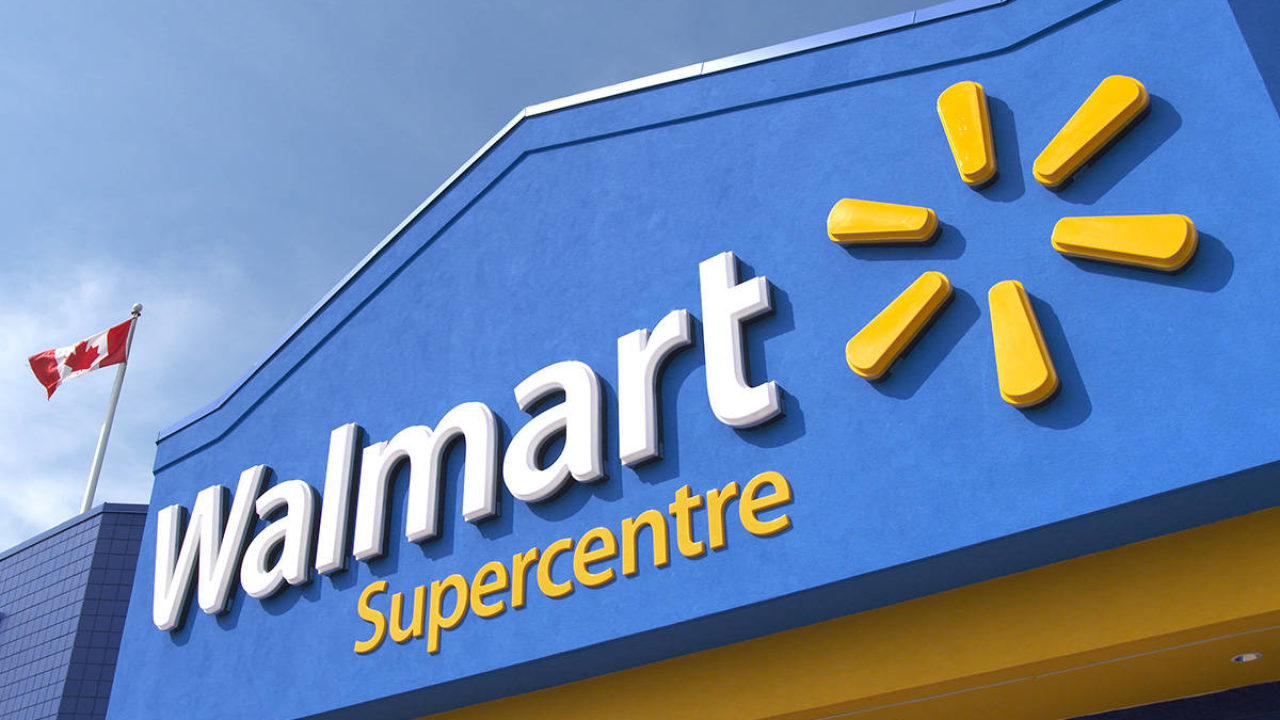

<b><h1><u><b><font color=teal>Walmart Business Case Study</b></u></h1>

<h5><b><font color=#045D5D>Importing Libraries for Data Analysis and Visualization</font></h5>

In [ ]:
# Importing the Libraries:
import pandas as pd
import numpy as np
import scipy.stats as stats
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

<h5><b><font color=#045D5D>Uploading File to Google Colab Environment</h5>

In [ ]:
# Upload the File
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


<b><font color=#045D5D>Loading Data from CSV File into DataFrame

In [ ]:
# Loading Walmart Data from CSV File
Data = pd.read_csv('walmart_data.csv')


<b><font color=#045D5D>Creating a Copy of the DataFrame

In [ ]:
# Creating a Copy of the Walmart Data
df = Data.copy()

<h1><b><font color=#00827F>1. Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset

In [ ]:
# Previewing the First Five Rows of the DataFrame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Getting the Dimensions of the DataFrame
df.shape

(550068, 10)

In [ ]:
# Displaying DataFrame Summary Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Checking for Missing Values in the DataFrame
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
# Listing Column Names in the DataFrame
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Counting Duplicate Rows in the DataFrame
df.duplicated().sum()

0

In [ ]:
# Counting Unique Values in Each Column of the DataFrame
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
# Statistical Summary of the DataFrame
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Transposed Statistical Summary of the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# Transposed Statistical Summary of Categorical Columns in the DataFrame
df.describe(include = 'object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
# Displaying the Data Types of Each Column in the DataFrame
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


<h1><b><font color=#00827F>2. Detect Null Values and Outliers</b><br>


<b><font color=#045D5D>a) Find the outliers for every continuous variable in the dataset<br>
<b><font color=#045D5D>b) Remove/clip the data between the 5 percentile and 95 percentile

<b><font color=#045D5D>Identifying Continuous Variables::

In [ ]:
# Identifying Continuous Variables:
Continuous_Vars = df.select_dtypes(include=['float64', 'int64']).columns
Continuous_Vars

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

<b><font color=#045D5D>i) Outliers Dedection for User_ID:

In [ ]:
# Outliers Dedection for User_ID:
# Calculate the 5th and 95th percentiles:
Lower_Bound = df['User_ID'].quantile(0.05)
Upper_Bound = df['User_ID'].quantile(0.95)

# Clip the data between the 5th and 95th percentiles:
df['User_ID_Clipped'] = np.clip(df['User_ID'], Lower_Bound, Upper_Bound)

# Display the first few rows of the modified DataFrame
print(df[['User_ID', 'User_ID_Clipped']])

        User_ID  User_ID_Clipped
0       1000001          1000329
1       1000001          1000329
2       1000001          1000329
3       1000001          1000329
4       1000002          1000329
...         ...              ...
550063  1006033          1005747
550064  1006035          1005747
550065  1006036          1005747
550066  1006038          1005747
550067  1006039          1005747

[550068 rows x 2 columns]


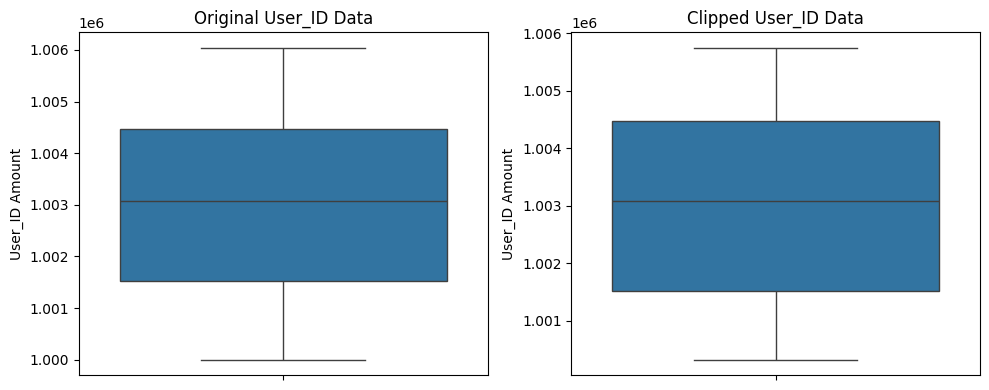

In [ ]:
# Visualizing User_ID Amounts with a Boxplot to find the Outliers:

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Create a boxplot for the original User_ID data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['User_ID'])
plt.title('Original User_ID Data')
plt.ylabel('User_ID Amount')

# Create a boxplot for the clipped User_ID data
plt.subplot(1, 2, 2)
sns.boxplot(y=df['User_ID_Clipped'])
plt.title('Clipped User_ID Data')
plt.ylabel('User_ID Amount')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

<b><font color=#045D5D>ii) Outliers Dedection for Occupation:

In [ ]:
# Outliers Dedection for Occupation:
# Calculate the 5th and 95th percentiles:
Lower_Bound = df['Occupation'].quantile(0.05)
Upper_Bound = df['Occupation'].quantile(0.95)

# Clip the data between the 5th and 95th percentiles:
df['Occupation_Clipped'] = np.clip(df['Occupation'], Lower_Bound, Upper_Bound)

# Display the first few rows of the modified DataFrame
print(df[['Occupation', 'Occupation_Clipped']])

        Occupation  Occupation_Clipped
0               10                  10
1               10                  10
2               10                  10
3               10                  10
4               16                  16
...            ...                 ...
550063          13                  13
550064           1                   1
550065          15                  15
550066           1                   1
550067           0                   0

[550068 rows x 2 columns]


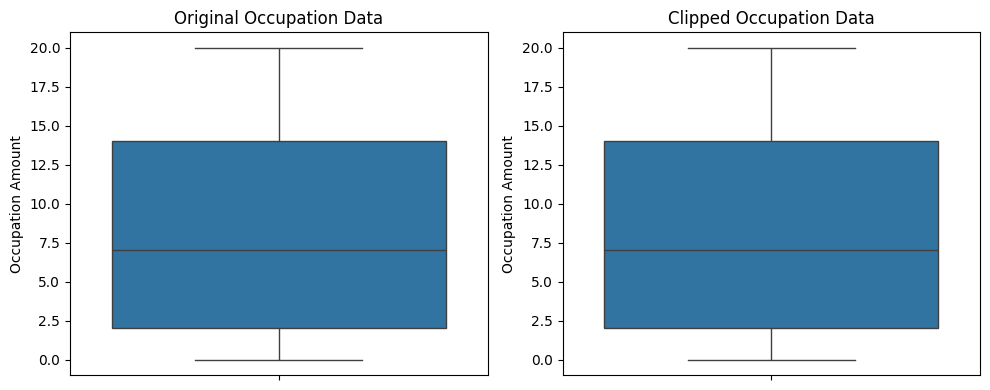

In [ ]:
# Visualizing Occupation Amounts with a Boxplot to find the Outliers:

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Create a boxplot for the original Occupation data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Occupation'])
plt.title('Original Occupation Data')
plt.ylabel('Occupation Amount')

# Create a boxplot for the clipped Occupation data
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Occupation_Clipped'])
plt.title('Clipped Occupation Data')
plt.ylabel('Occupation Amount')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

<b><font color=#045D5D>iii) Outliers Dedection for Product_Category:

In [ ]:
# Outliers Dedection for Occupation:
# Calculate the 5th and 95th percentiles:
Lower_Bound = df['Product_Category'].quantile(0.05)
Upper_Bound = df['Product_Category'].quantile(0.95)

# Clip the data between the 5th and 95th percentiles:
df['Product_Category_Clipped'] = np.clip(df['Product_Category'], Lower_Bound, Upper_Bound)

# Display the first few rows of the modified DataFrame
print(df[['Product_Category', 'Product_Category_Clipped']])

        Product_Category  Product_Category_Clipped
0                      3                         3
1                      1                         1
2                     12                        12
3                     12                        12
4                      8                         8
...                  ...                       ...
550063                20                        13
550064                20                        13
550065                20                        13
550066                20                        13
550067                20                        13

[550068 rows x 2 columns]


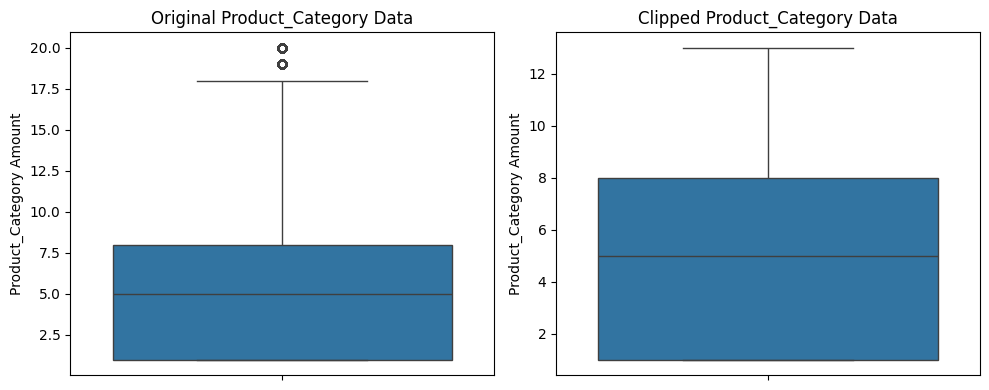

In [ ]:
# Visualizing Product_Category Amounts with a Boxplot to find the Outliers:

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Create a boxplot for the original Product_Category data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Product_Category'])
plt.title('Original Product_Category Data')
plt.ylabel('Product_Category Amount')

# Create a boxplot for the clipped Product_Category data
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Product_Category_Clipped'])
plt.title('Clipped Product_Category Data')
plt.ylabel('Product_Category Amount')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

<b><font color=#045D5D>iv) Outliers Dedection for Purchase:

In [ ]:
# Outliers Dedection for Purchase:
# Calculate the 5th and 95th percentiles:
Lower_Bound = df['Purchase'].quantile(0.05)
Upper_Bound = df['Purchase'].quantile(0.95)

# Clip the data between the 5th and 95th percentiles:
df['Purchase_Clipped'] = np.clip(df['Purchase'], Lower_Bound, Upper_Bound)

# Display the first few rows of the modified DataFrame
print(df[['Purchase', 'Purchase_Clipped']].head())

   Purchase  Purchase_Clipped
0      8370              8370
1     15200             15200
2      1422              1984
3      1057              1984
4      7969              7969


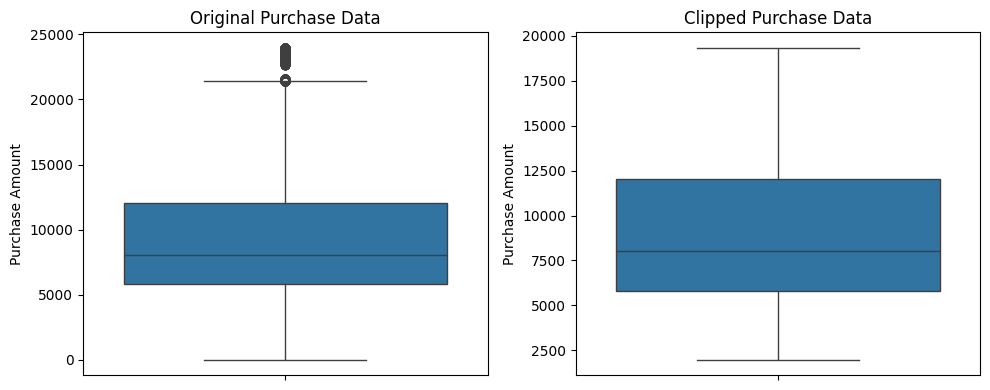

In [ ]:
# Visualizing Purchase Amounts with a Boxplot to find the Outliers:

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Create a boxplot for the original Purchase data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Purchase'])
plt.title('Original Purchase Data')
plt.ylabel('Purchase Amount')

# Create a boxplot for the clipped Purchase data
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Purchase_Clipped'])
plt.title('Clipped Purchase Data')
plt.ylabel('Purchase Amount')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Improved Data Quality:<br></b>
i) By clipping outliers, the data becomes more representative of the typical user, reducing the influence of extreme values.<br>
ii) This improves the robustness and reliability of subsequent analyses.

<h5><b><font color=#045D5D>Impact on Analysis:<br></b>
i) Reducing outliers can stabilize algorithms sensitive to extreme values, like linear regression.<br>
ii) Insights derived from the clipped data will be more reflective of the central trends rather than skewed by extreme anomalies.

<h5><b><font color=#045D5D>Data Distribution:<br></b>
i) Visualizing the data before and after clipping (e.g., with boxplots or histograms) can provide a clear picture of the outliers' impact and the data’s distribution.<br>
ii) This helps in understanding how much the outliers skew the data and how effective the clipping process is.


<h5><b><font color=#045D5D>Further Steps:<br></b>
i) After clipping, re-evaluate the data distribution and consider further transformations or normalizations if needed.<br>
ii) Use the cleaned data for training predictive models or performing other statistical analyses to ensure higher accuracy and performance.



<h1><b><font color=#00827F>3. Data Exploration</b><br><h1>
<h5><b><font color=#045D5D>a) What products are different age groups buying?<br>


In [ ]:
# Group by Age and Product_Category, then aggregate the total Purchase amounts:
# Age_Product_Purchase = df.groupby(['Age', 'Product_Category'])['Purchase'].sum().sort_values(ascending=False).reset_index()
# print(Age_Product_Purchase)

Age_Product_Purchase = df.groupby('Age')['Purchase'].sum().sort_values(ascending=False).reset_index()
print(Age_Product_Purchase)

     Age    Purchase
0  26-35  2031770578
1  36-45  1026569884
2  18-25   913848675
3  46-50   420843403
4  51-55   367099644
5    55+   200767375
6   0-17   134913183


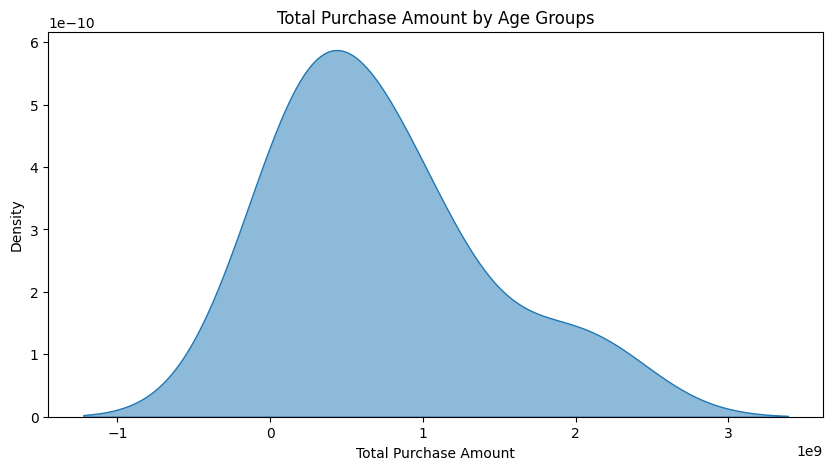

In [ ]:
# Create the KDE plot
plt.figure(figsize=(10, 5))

# Since Age_Product_Purchase contains the total purchase amounts by age,
sns.kdeplot(data=Age_Product_Purchase, x='Purchase', fill=True, alpha=0.5)

# Set title and labels
plt.title('Total Purchase Amount by Age Groups')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Density')
plt.grid(False)
plt.show()

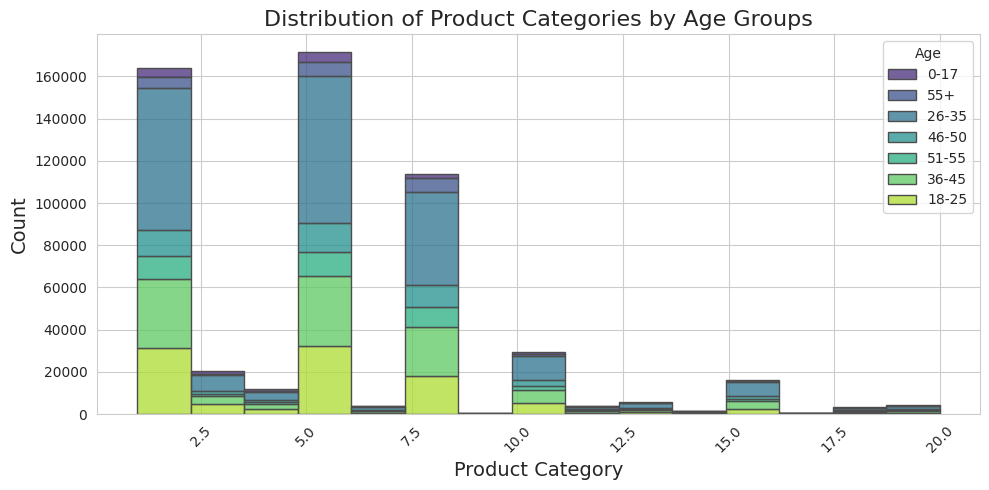

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Set up the figure size
plt.figure(figsize=(10, 5))

# Create a histplot to show the distribution of Product Categories by Age
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack', palette='viridis', edgecolor='.3', bins=15)

# Set plot title and labels
plt.title('Distribution of Product Categories by Age Groups', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Age Group Spending Patterns:<br></b>
Analyze top-spending age groups to target high-value demographics effectively.

<h5><b><font color=#045D5D>Product Category Popularity by Age:<br></b>
Visualize which age groups prefer specific product categories to tailor offerings.

<h5><b><font color=#045D5D>Strategic Marketing Insights:<br></b>
Develop focused campaigns to engage key spending age groups for increased sales.

<h5><b><font color=#045D5D>Inventory Management:<br></b>
Optimize stock levels based on age-specific product preferences for better service.

<h5><b><font color=#045D5D>Pricing Strategies:<br></b>
Craft pricing models that reflect the varying spending powers of different age groups.

<h5><b><font color=#045D5D>b) Is there a relationship between age, marital status, and the amount spent?<br>
Multivariate Analysis Techniques

In [ ]:
# b. Group Analysis with Aggregation
# Clean 'Stay_In_Current_City_Years' to make it numeric
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+': 4})
Relationship_between_Age_Marital_Status = df.groupby(['Age', 'Marital_Status'])['Purchase'].sum().reset_index()
print(Relationship_between_Age_Marital_Status)

      Age  Marital_Status    Purchase
0    0-17               0   134913183
1   18-25               0   723920602
2   18-25               1   189928073
3   26-35               0  1233330102
4   26-35               1   798440476
5   36-45               0   624110760
6   36-45               1   402459124
7   46-50               0   113658360
8   46-50               1   307185043
9   51-55               0   103792394
10  51-55               1   263307250
11    55+               0    75202046
12    55+               1   125565329


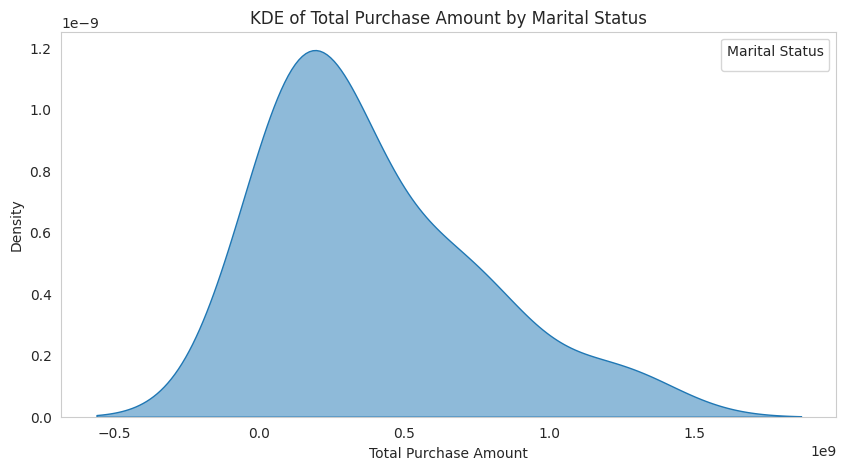

In [ ]:
# Create the KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=Relationship_between_Age_Marital_Status, x='Purchase', fill=True, alpha=0.5)

# Set title and labels
plt.title('KDE of Total Purchase Amount by Marital Status')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Density')
plt.legend(title='Marital Status')
plt.grid(False)
plt.show()

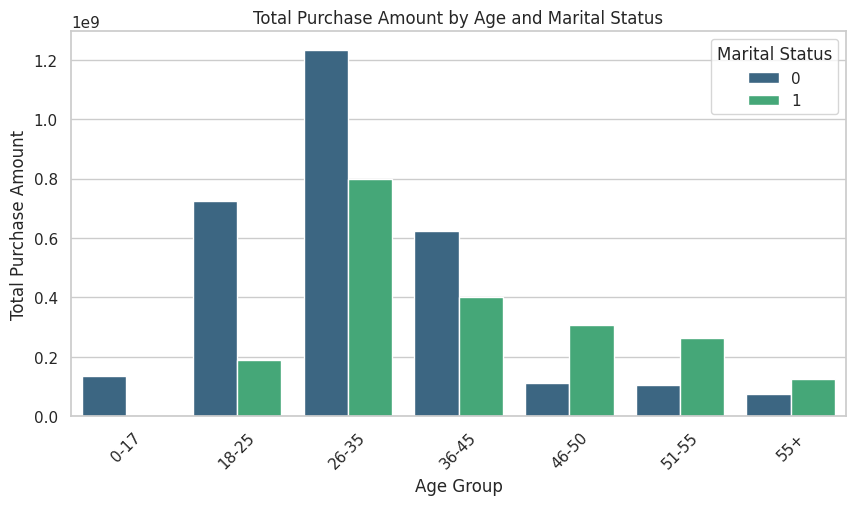

In [ ]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='Purchase', hue='Marital_Status', data=Relationship_between_Age_Marital_Status, palette='viridis')

# Set title and labels
plt.title('Total Purchase Amount by Age and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Age Group vs. Total Purchase:<br></b>
The bar plot shows the total purchase amounts for different age groups. This helps identify which age groups are the biggest spenders.

<h5><b><font color=#045D5D>Impact of Marital Status:<br></b>
i) By introducing Marital_Status as a hue, the plot differentiates spending patterns between married and unmarried individuals within each age group.<br>
ii) Noticeable differences indicate how marital status influences spending habits in various age groups.

<h5><b><font color=#045D5D>Spending Trends:<br></b>
i) Younger age groups might show varied spending habits based on their marital status. For example, unmarried individuals in the '18-25' group might spend differently compared to their married counterparts.<br>
ii) In older age groups, you might observe more uniform spending patterns regardless of marital status, or even greater spending among married individuals due to family expenses.

<h5><b><font color=#045D5D>c) Are there preferred product categories for different genders?
<br>


In [ ]:
# These headings represent the product category and the count of each gender that purchased those products.
Product_Cat_different_Gender = df.groupby(['Product_Category', 'Gender']).size().unstack(fill_value=0).reset_index()
print(Product_Cat_different_Gender)

Gender  Product_Category      F       M
0                      1  24831  115547
1                      2   5658   18206
2                      3   6006   14207
3                      4   3639    8114
4                      5  41961  108972
5                      6   4559   15907
6                      7    943    2778
7                      8  33558   80367
8                      9     70     340
9                     10   1162    3963
10                    11   4739   19548
11                    12   1532    2415
12                    13   1462    4087
13                    14    623     900
14                    15   1046    5244
15                    16   2402    7426
16                    17     62     516
17                    18    382    2743
18                    19    451    1152
19                    20    723    1827


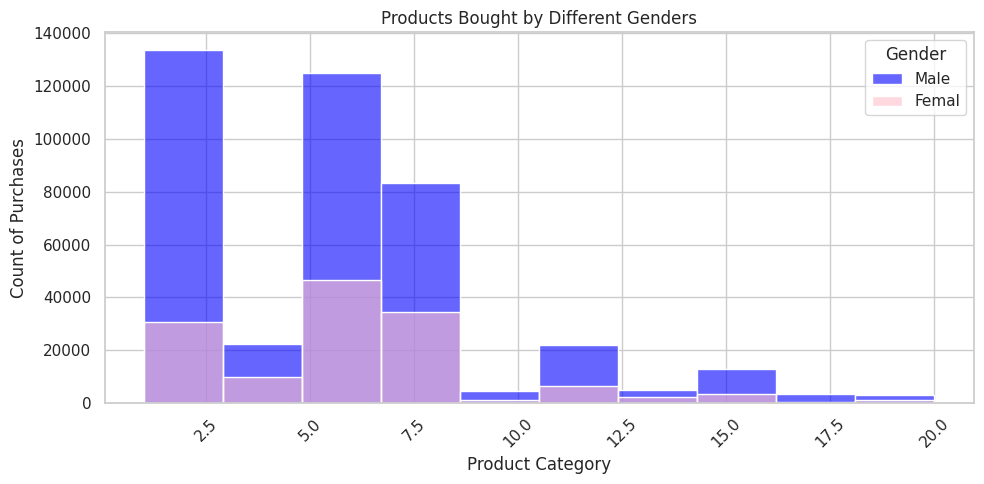

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
# Create a histplot for Male & Femal users:
sns.histplot(data=df[df['Gender'] == 'M'], x='Product_Category', bins=10, color='blue', label='Male', stat='count', alpha=0.6)
sns.histplot(data=df[df['Gender'] == 'F'], x='Product_Category', bins=10, color='pink', label='Femal', stat='count', alpha=0.6)

# Set title and labels
plt.title('Products Bought by Different Genders')
plt.xlabel('Product Category')
plt.ylabel('Count of Purchases')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Product Category Preferences by Gender:<br></b>
i) The histplot visualization clearly shows the distribution of purchases for different product categories by male and female customers.<br>
ii) By comparing the heights of the bars for each product category, you can identify which categories are more popular among men and women.

<h5><b><font color=#045D5D>Gender-Specific Popular Categories:<br></b>
i) If you notice higher bars for a certain product category under one gender, it indicates a stronger preference for that category.<br>
ii) For example, if the "Electronics" category has a noticeably higher count for males, it suggests that male customers are more likely to purchase electronics.

<h5><b><font color=#045D5D>Marketing Strategies:<br></b>
i) Walmart can use these insights to tailor marketing strategies and promotions to specific gender preferences.<br>
ii) For example, targeting females with promotions on categories where they have higher purchase counts and males with different promotional offers based on their preferences.

<h5><b><font color=#045D5D>Inventory Management:<br></b>
i) Knowing the preferred product categories for different genders can help in better inventory management.<br>
ii) Ensuring that popular products for each gender are well-stocked can improve customer satisfaction and sales.

<h5><b><font color=#045D5D>Personalized Shopping Experience:<br></b>
i) Walmart can enhance the shopping experience by offering personalized recommendations based on gender-specific preferences.<br>
ii) Personalized emails or app notifications can include product suggestions that align with the purchasing patterns of each gender.

<h1><b><font color=#00827F>4. How does gender affect the amount spent?</b><br><h1>
<h5><b><font color=#045D5D>a. From the above calculated CLT answer the following questions<br>
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?<br>
ii. How is the width of the confidence interval affected by the sample size?<br>
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?


In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_ID_Clipped,Occupation_Clipped,Product_Category_Clipped,Purchase_Clipped
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1000329,10,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1000329,10,1,15200


In [ ]:
# Function to calculate bootstrap confidence intervals
def bootstrap_confidence_intervals(data, sample_size, n_bootstraps=1000, confidence=0.95):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = data.sample(n=sample_size, replace=True)
        bootstrapped_means.append(sample['Purchase'].mean())
    # Compute confidence interval from the bootstrapped means
    lower_bound = np.percentile(bootstrapped_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Function to calculate bootstrap sample means for plotting
def bootstrap_sample_means(data, sample_size, n_bootstraps=1000):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = data.sample(n=sample_size, replace=True)
        bootstrapped_means.append(sample['Purchase'].mean())
    return bootstrapped_means

# Sample sizes to evaluate
sample_sizes = [300, 3000, 30000]
ci_results = {}
sample_means_data = {}

In [ ]:
for size in sample_sizes:
    # Calculate confidence intervals for both genders
    ci_results[f'Female_{size}'] = bootstrap_confidence_intervals(df[df['Gender'] == 'F'], size)
    ci_results[f'Male_{size}'] = bootstrap_confidence_intervals(df[df['Gender'] == 'M'], size)

    # Generate bootstrapped means for histograms
    sample_means_data[f'Female_{size}'] = bootstrap_sample_means(df[df['Gender'] == 'F'], size)
    sample_means_data[f'Male_{size}'] = bootstrap_sample_means(df[df['Gender'] == 'M'], size)

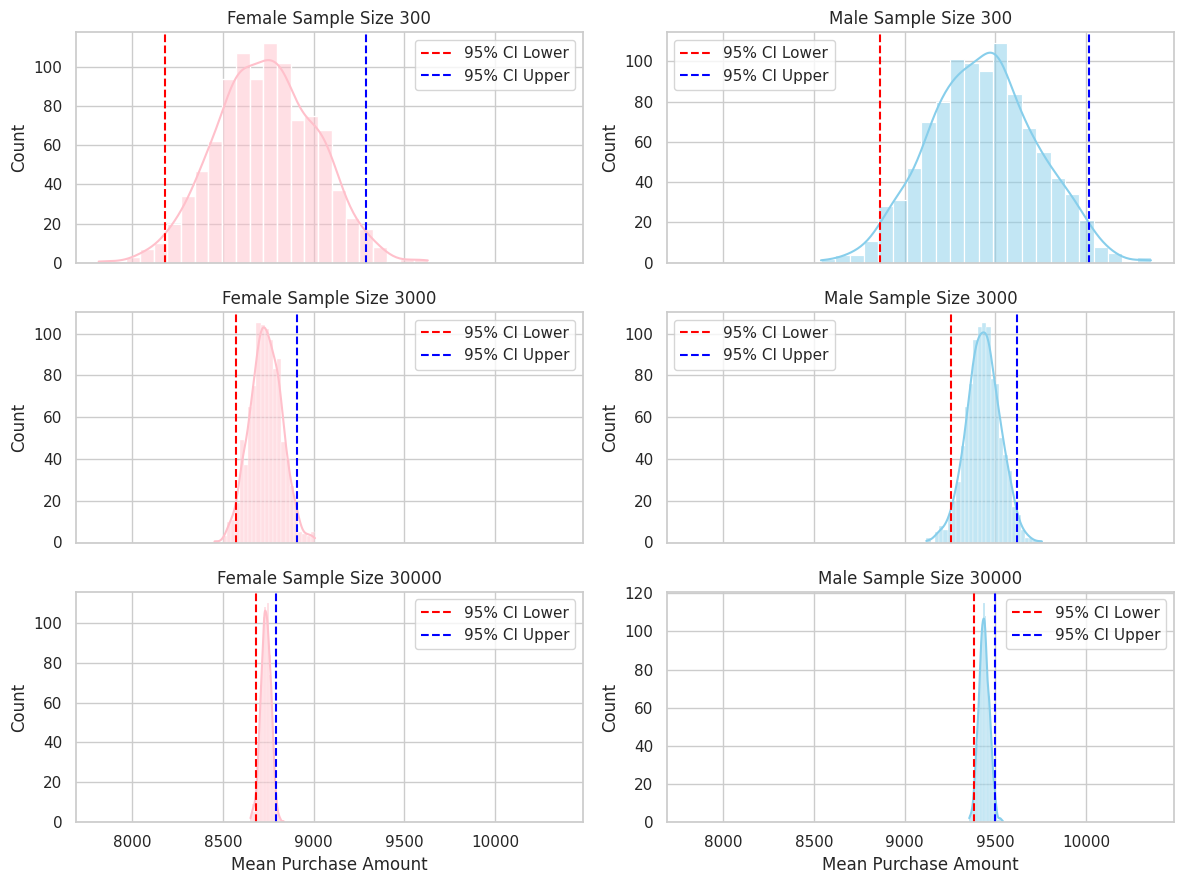

In [ ]:
# Plot the Distribution of Sample Means with Confidence Intervals:
fig, axes = plt.subplots(3, 2, figsize=(12, 9), sharex = True)

for idx, size in enumerate(sample_sizes):
    # Female sample means and confidence interval plot
    sns.histplot(sample_means_data[f'Female_{size}'], kde=True, ax=axes[idx, 0], color='pink')
    ci_female = ci_results[f'Female_{size}']
    axes[idx, 0].axvline(ci_female[0], color='red', linestyle='--', label=f"95% CI Lower")
    axes[idx, 0].axvline(ci_female[1], color='blue', linestyle='--', label=f"95% CI Upper")
    axes[idx, 0].set_title(f"Female Sample Size {size}")
    axes[idx, 0].set_xlabel("Mean Purchase Amount")
    axes[idx, 0].legend()

    # Male sample means and confidence interval plot
    sns.histplot(sample_means_data[f'Male_{size}'], kde=True, ax=axes[idx, 1], color='skyblue')
    ci_male = ci_results[f'Male_{size}']
    axes[idx, 1].axvline(ci_male[0], color='red', linestyle='--', label=f"95% CI Lower")
    axes[idx, 1].axvline(ci_male[1], color='blue', linestyle='--', label=f"95% CI Upper")
    axes[idx, 1].set_title(f"Male Sample Size {size}")
    axes[idx, 1].set_xlabel("Mean Purchase Amount")
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Confidence Interval Width:<br></b>
i) The confidence interval calculated using the entire dataset might be wider for one gender if there is higher variability in spending patterns within that gender.<br>
ii) A wider confidence interval indicates more uncertainty around the mean, suggesting that the spending behavior within that gender is less consistent.

<h5><b><font color=#045D5D>Effect of Sample Size on Confidence Interval Width:<br></b>
i) As the sample size increases, the width of the confidence interval generally decreases.<br>
ii) Larger sample sizes provide more precise estimates of the average spending, reducing the uncertainty around the mean.

<h5><b><font color=#045D5D>Overlap of Confidence Intervals:<br></b>
i) If the confidence intervals for different sample sizes overlap, it suggests that the average spending between the two genders is not significantly different.<br>
ii) Non-overlapping confidence intervals would indicate significant differences in average spending between genders.

<h5><b><font color=#045D5D>Effect of Sample Size on Distribution Shape:<br></b>
i) Larger sample sizes tend to produce a more normal distribution of the sample means, thanks to the Central Limit Theorem.<br>
ii) This normality allows for more accurate and reliable confidence interval estimates.

<u><h1><b><font color=#00827F>Recommendations for Walmart:</b><br><h1></u>
<h5><b><font color=#045D5D>Targeted Marketing Strategies:<br></b>
Gender-Specific Promotions: Develop targeted marketing campaigns and promotions based on the spending patterns of each gender. For instance, if males show higher spending in certain categories, tailor promotions to attract more male customers.

<h5><b><font color=#045D5D>Personalized Shopping Experience:<br></b>
Utilize the confidence interval insights to offer personalized recommendations and deals to customers. This can enhance customer satisfaction and loyalty by catering to individual preferences.

<h5><b><font color=#045D5D>Inventory Management:<br></b>
Use the insights on spending patterns to optimize inventory levels. Ensure that popular products among each gender are adequately stocked to prevent stockouts and meet customer demand effectively.

<h5><b><font color=#045D5D>Pricing Strategies:<br></b>
Develop pricing strategies that reflect the spending power and preferences of different genders. For example, offer premium products or bundled deals to genders showing higher spending patterns.


<h1><b><font color=#00827F>1) Gender-Based Spending Hypothesis Test</b><br><h1>

In [ ]:
# Separate data for males and females
male_spending = df[df['Gender'] == 'M']['Purchase']
female_spending = df[df['Gender'] == 'F']['Purchase']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(male_spending, female_spending, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in spending between males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference in spending between males and females.")

T-statistic: 46.358248669626064
P-value: 0.0

Reject the null hypothesis: There is a significant difference in spending between males and females.


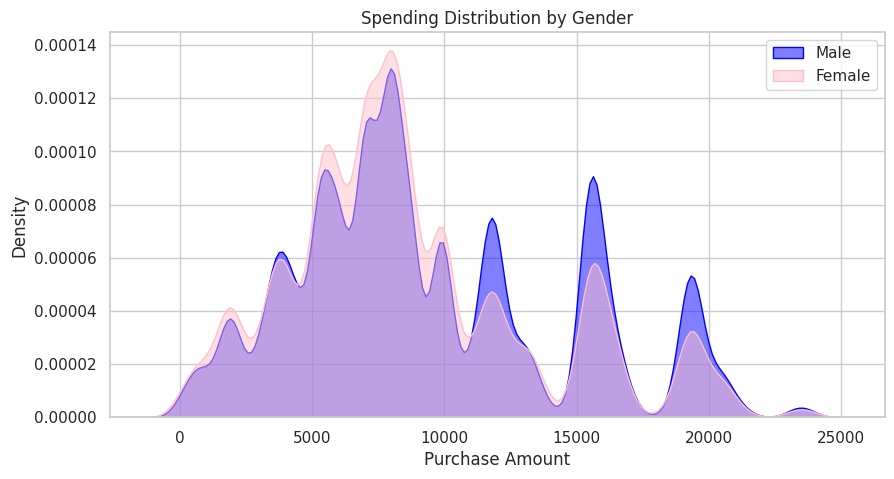

In [ ]:
# KDE Plot for Spending Distribution by Gender
plt.figure(figsize=(10, 5))
sns.kdeplot(data=male_spending, fill=True, color="blue", label="Male", alpha=0.5)
sns.kdeplot(data=female_spending, fill=True, color="pink", label="Female", alpha=0.5)
plt.title("Spending Distribution by Gender")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

<u><h1><b><font color=#00827F>Insights and Interpretation</b><br><h1></u>
<h5><b><font color=#045D5D>Hypothesis Test Result: <br></b>
<b>If the p-value < 0.05:</b> This indicates a significant difference in spending between males and females. It means Walmart can create gender-specific marketing campaigns based on this finding.<br>
<h5><b><font color=#045D5D>KDE Plot Analysis: <br></b>
<b>KDE (Kernel Density Estimate) Plot:</b> This helps Walmart visually understand the spending distribution trends. For example, they can see which spending ranges are more common for males and females, aiding in better-targeted marketing strategies.<br>



<h1><b><font color=#00827F>2) Marital Status and Product Category using Chi-Square Test</b><br><h1>

In [ ]:
# Create a contingency table
Contingency_Table = pd.crosstab(df['Marital_Status'], df['Product_Category'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(Contingency_Table)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p}")

Chi2 Stat: 539.4762103623166, P-value: 2.8475938150382975e-102


<h2><b><font color=#00827F> Insights</h2>
<h4><b>1) Chi-Square Test Statistic (Chi2 Stat): </b>This value represents the difference between the observed and expected frequencies in each category of the contingency table. A higher chi-square value generally suggests a stronger association.<br>
<b>2) P-value: </b>If the p-value is less than the chosen significance level (typically 0.05), it indicates a significant association between marital status and product category. This means married and unmarried customers show different purchasing behaviors in certain product categories.<br>
<b>3) Degrees of Freedom (dof): </b>This tells us how many independent values are free to vary in the table, although it does not directly impact our interpretation of the association.<br><br>

<h2><b><font color=#00827F>Recommendations</font></h2>
<h4><b>For Significant Association (p-value < 0.05):</b><br>
<b>Targeted Product Marketing:</b> Walmart can design product-specific campaigns targeting married or unmarried customers. For example, if married customers have a higher preference for certain household or family-related items, Walmart can promote these items more actively to married individuals.<br>
<b>Personalized Promotions: </b>Walmart could leverage marital status to create personalized promotions. For example, products preferred by unmarried individuals could be promoted during events or seasons when single individuals might shop more.<br>
<b>For No Significant Association (p-value >= 0.05):</b><br>
<b>Generalized Marketing: </b>If there’s no significant association, Walmart can approach marketing strategies without segmenting by marital status, as the product preferences are similar across both groups.<br>
<b>Unified Inventory Management: </b>Since both married and unmarried groups would show similar purchasing trends, Walmart could maintain a uniform stock level for these product categories without needing to differentiate by marital status.

<h1><b><font color=#00827F>3) Chi-square Test for Association between Gender and Marital Status

In [ ]:
Gender_by_Marital_Status = pd.crosstab(index=df['Gender'], columns=df['Marital_Status'])

chi_stat, p_value, df, exp_feq = chi2_contingency(Gender_by_Marital_Status)
print('chi_stat :', chi_stat)
print('p_value :', p_value)
print('DOF :', df)
print('exp_feq :', exp_feq)

chi_stat : 74.00272697523472
p_value : 7.80091894540745e-18
DOF : 1
exp_feq : [[ 80174.43730412  55634.56269588]
 [244556.56269588 169702.43730412]]


In [ ]:
alpha = 0.5
if p_value < alpha:
  print('Reject H0')
  print('Gender impacts Marital Status')
else:
  print('Fail to Reject H0')
  print('Gender does not impact Marital Status')

Reject H0
Gender impacts Marital Status


<h2><b><font color=#00827F> Insights</h2></b>
<h4>1) If the p-value is less than 0.5 (your chosen alpha level), you would reject the null hypothesis (H0), which states that there is no relationship between gender and marital status. In this case, you conclude that gender does impact marital status.

 2) If the p-value is greater than or equal to 0.5, you fail to reject the null hypothesis, indicating that there is no significant impact of gender on marital status.<br><br>


<h2><b><font color=#00827F> Recommendations</h2>
<h4><b>If you reject H0:</b>
<h4><b>1) Targeted Marketing: </b>Use the insights to tailor marketing strategies based on gender demographics, potentially creating gender-specific campaigns for different marital statuses.<br>

<b>2) Product Development: </b>Consider developing products or services that cater specifically to the preferences of different gender and marital status combinations.<br>

<h4><b>If you reject H0:</b>
<h4><b>1) Focus on Other Factors:</bSince gender does not significantly impact marital status, explore other variables that might be more relevant or influential in your analysis.<br>

2) Broaden Analysis: </b> Consider including additional demographic factors (e.g., age, income, education) in your analysis to gain a more comprehensive understanding of customer behavior and preferences.<br>



<h1><b><font color=#00827F>4) Gender and Purchase Amounts Analysis using Two-Sample t-test</b><br><h1>

In [ ]:
# Separate Purchase data by Gender
Male_Purchase = df[df['Gender'] == 'M']['Purchase']
Female_Purchase = df[df['Gender'] == 'F']['Purchase']

# Perform Two-Sample t-test
t_stat, p_value = ttest_ind(Male_Purchase, Female_Purchase)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 44.837957934353966, P-value: 0.0


**Insights and Recommendations**

If you fail to reject
𝐻
0
  (i.e., no significant difference):

*   Uniform Marketing Approach: Since there is no significant difference, consider a unified marketing strategy that does not heavily focus on gender.
*   Explore Other Factors: Look into other demographic or behavioral factors that might influence purchasing behavior. Expanding your analysis to include variables like age, income, or location may reveal more insights.

If you reject
𝐻
0
​
  (i.e., significant difference):


*   Marketing Strategies: Tailor marketing campaigns based on gender preferences if a significant difference in purchasing behavior is found. For example, if males spend significantly more, consider promotions targeted toward female customers to boost their purchasing.
*   Product Development: Use insights from the data to design products or services that cater specifically to the purchasing patterns of each gender.





  <h1><b><font color=#00827F>5) Chi-square Test for Association between Gender and Purchase

In [ ]:
Gender_by_City_Category = pd.crosstab(index=df['Gender'], columns=df['City_Category'])
chi_stat, p_value, df, exp_feq = chi2_contingency(Gender_by_City_Category)
print('chi_stat :', chi_stat)
print('p_value :', p_value)
print('DOF : ', df)
print('exp_feq :', exp_feq)

chi_stat : 33.58382571304351
p_value : 5.097590042852447e-08
DOF :  2
exp_feq : [[ 36471.3189642  57075.4415036  42262.2395322]
 [111248.6810358 174097.5584964 128912.7604678]]


In [ ]:
alpha = 0.5
if p_value < alpha:
  print('Reject H0')
  print('Gender impacts City_Category')
else:
  print('Fail to Reject H0')
  print('Gender does not impact City_Category')

Reject H0
Gender impacts City_Category


<h2><b><font color=#00827F> Insights</h2>
<h4><b>1) If you reject H0 (if p_value < 0.5): </b>This indicates that there is a significant association between gender and city category. It suggests that males and females might have different distributions across the city categories.<br>
<b>2) If you fail to reject H0 (if p_value >= 0.5): </b>This indicates that there is no significant association between gender and city category. In this case, gender does not appear to affect the distribution across city categories.<br>

<h2><b><font color=#00827F> Recommendations</h2>
<h4><b>If you reject H0:</b>
<h4><b>1) Tailored Marketing Strategies: </b>Utilize the insights from the association to develop gender-specific marketing campaigns targeted at specific city categories. For example, if certain city categories have a higher concentration of a particular gender, marketing efforts can be directed accordingly.<br>

<b>2) Location-Based Promotions: </b>Consider implementing promotions or product offerings based on gender preferences in different city categories. This could enhance customer engagement and sales.<br>

<h4><b>If you reject H0:</b>
<h4><b>1) Reassess Target Markets: Since gender does not significantly influence city category preferences, consider looking at other factors such as age, income, or lifestyle preferences that might impact customer behavior.<br>

2) Broadening the Analysis: </b> Expand your analysis to include additional demographic and psychographic variables to gain a more holistic understanding of your customers. This can help uncover other significant patterns that might inform business strategies.<br>


<h1><b><font color=#00827F>6) Age Group Preferences using ANOVA</b><br><h1>

In [ ]:
# Group purchases by Age
age_groups = [df[df['Age'] == age]['Purchase'] for age in df['Age'].unique()]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*age_groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 40.57579909450408, P-value: 1.053563939251671e-49


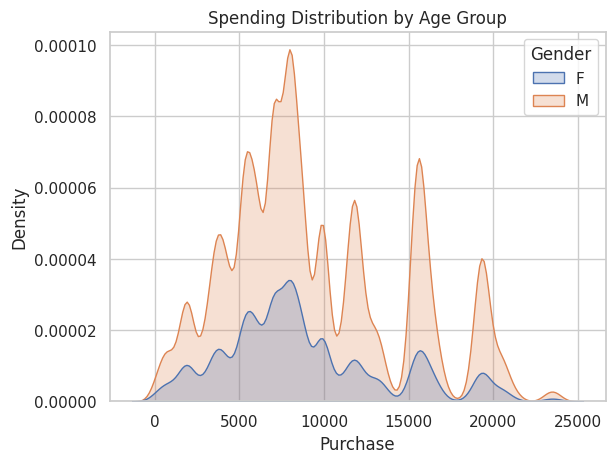

In [ ]:
# KDE plot for spending distribution by Age
sns.kdeplot(data=df, x='Purchase', hue='Gender', fill='bule')
plt.title('Spending Distribution by Age Group')
plt.show()

**Insights**

If you reject 𝐻0 (significant differences):


*   This suggests that age plays a role in how much individuals spend, and there could be specific age groups that differ significantly from others in terms of purchasing behavior.

If you fail to reject 𝐻0(no significant differences):


*   This indicates that, across age groups, the average spending does not vary significantly. The purchasing behavior may be consistent across ages.

**Recommendations**
If you reject 𝐻0:


*   Targeted Marketing Campaigns: Develop age-specific marketing strategies, such as promotions or products that cater to the spending habits of the age groups that spend significantly more.
*   Segmentation Analysis: Perform deeper analysis on the age groups that differ significantly to understand their preferences and tailor your offerings to those segments.

If you fail to rejectH0:


*   Unified Marketing Approach: Since spending is consistent across age groups, consider a broad approach in your marketing strategy that doesn't focus solely on age.
*   Explore Additional Factors: Investigate other potential factors (e.g., gender, income, location) that might influence purchasing behavior, as they could reveal other segments worth exploring.







<h1><b><font color=#00827F>5. How does Marital_Status affect the amount spent?</b><br><h1>
<h5><b><font color=#045D5D>a. From the above calculated CLT answer the following questions.
<br>
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?<br>
ii. How is the width of the confidence interval affected by the sample size?<br>
iii. Do the confidence intervals for different sample sizes overlap?<br>
iv. How does the sample size affect the shape of the distributions of the
means?


In [ ]:
# Loop through sample sizes and calculate confidence intervals for Marital_Status
for size in sample_sizes:
    for marital_status in [0, 1]:
        # Filter data based on Marital_Status
        filtered_data = df[df['Marital_Status'] == marital_status]

        # Calculate confidence intervals
        ci_key = f'MaritalStatus_{marital_status}_{size}'
        ci_results[ci_key] = bootstrap_confidence_intervals(filtered_data, size)

        # Generate bootstrapped means for histograms
        sample_means_key = f'MaritalStatus_{marital_status}_{size}'
        sample_means_data[sample_means_key] = bootstrap_sample_means(filtered_data, size)

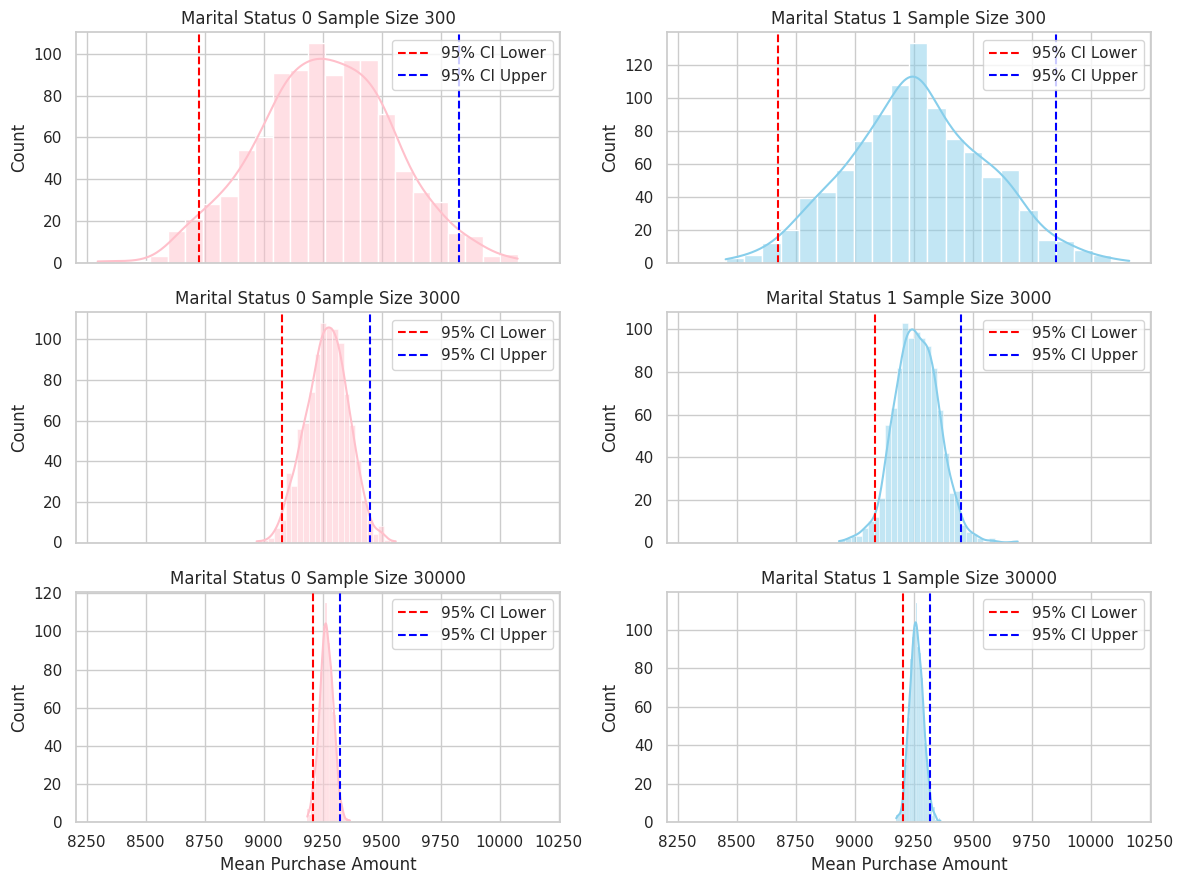

In [ ]:
# Plot the Distribution of Sample Means with Confidence Intervals
fig, axes = plt.subplots(3, 2, figsize=(12, 9), sharex=True)

for idx, size in enumerate(sample_sizes):
    # Sample means for Marital Status 0
    sns.histplot(sample_means_data[f'MaritalStatus_0_{size}'], kde=True, ax=axes[idx, 0], color='pink')
    ci_marital_0 = ci_results[f'MaritalStatus_0_{size}']
    axes[idx, 0].axvline(ci_marital_0[0], color='red', linestyle='--', label="95% CI Lower")
    axes[idx, 0].axvline(ci_marital_0[1], color='blue', linestyle='--', label="95% CI Upper")
    axes[idx, 0].set_title(f"Marital Status 0 Sample Size {size}")
    axes[idx, 0].set_xlabel("Mean Purchase Amount")
    axes[idx, 0].legend()

    # Sample means for Marital Status 1
    sns.histplot(sample_means_data[f'MaritalStatus_1_{size}'], kde=True, ax=axes[idx, 1], color='skyblue')
    ci_marital_1 = ci_results[f'MaritalStatus_1_{size}']
    axes[idx, 1].axvline(ci_marital_1[0], color='red', linestyle='--', label="95% CI Lower")
    axes[idx, 1].axvline(ci_marital_1[1], color='blue', linestyle='--', label="95% CI Upper")
    axes[idx, 1].set_title(f"Marital Status 1 Sample Size {size}")
    axes[idx, 1].set_xlabel("Mean Purchase Amount")
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()


<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h5><b><font color=#045D5D>Confidence Interval Width:<br></b>
<b>i) Entire Dataset:</b> The confidence interval calculated using the entire dataset may be wider for one marital status group if there is greater variability in spending patterns within that group. A wider confidence interval indicates less consistency in spending behavior.<br>
<b>ii) Reason:</b> Higher variability within a group leads to greater uncertainty around the mean, thus a wider confidence interval.

<h5><b><font color=#045D5D>Effect of Sample Size on Confidence Interval Width:<br></b>
<b>i) Smaller Sample Sizes:</b> Confidence intervals are typically wider due to higher variability and less information about the population.<br>
<b>ii) Larger Sample Sizes:</b> The width of the confidence interval generally decreases, providing a more precise estimate of the average spending.

<h5><b><font color=#045D5D>Overlap of Confidence Intervals:<br></b>
<b>i) Overlap:</b> If the confidence intervals for different sample sizes overlap, it suggests no significant difference in average spending between married and unmarried individuals.<br>
<b>ii) Non-Overlap:</b> Non-overlapping intervals indicate significant differences in spending behavior between the groups.

<h5><b><font color=#045D5D>Effect of Sample Size on Distribution Shape:<br></b>
<b>i) Smaller Samples:</b> Distributions of sample means may not follow a normal distribution due to limited data points.<br>
<b>ii) Larger Samples:</b> Distributions tend to be more normal and stable due to the Central Limit Theorem, leading to more reliable confidence interval estimates.

<u><h1><b><font color=#00827F>Recommendations for Walmart:</b><br><h1></u>
<h5><b><font color=#045D5D>Targeted Marketing Strategies:<br></b>
<b>i) Married Individuals:</b> If significant differences are observed, develop targeted marketing campaigns focusing on products and promotions that resonate more with married individuals.<br>
<b>ii) Unmarried Individuals:</b> Similarly, tailor promotions and advertising for unmarried customers, addressing their specific needs and preferences.

<h5><b><font color=#045D5D>Personalized Shopping Experience:<br></b>
<b>i) Customized Offers:</b> Use insights from the analysis to offer personalized recommendations and deals based on marital status. This can improve customer satisfaction and boost sales.

<h5><b><font color=#045D5D>Inventory Management:<br></b>
<b>i) Demand Forecasting:</b> Adjust inventory levels based on the spending patterns of married and unmarried customers. Ensure popular products for each group are well-stocked.

<h5><b><font color=#045D5D>Pricing Strategies:<br></b>
<b>i) Reflecting Spending Power:</b>Develop pricing models that consider the spending power and preferences of married and unmarried customers. Offer premium products or bundled deals accordingly.

<h1><b><font color=#00827F>6. How does Age affect the amount spent?</b><br><h1>
<h5><b><font color=#045D5D>a. From the above calculated CLT answer the following questions.
<br>
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?<br>
ii. How is the width of the confidence interval affected by the sample size?<br>
iii. Do the confidence intervals for different sample sizes overlap?<br>
iv. How does the sample size affect the shape of the distributions of the
means?


In [ ]:
# Function to calculate bootstrap confidence intervals
def bootstrap_confidence_intervals(data, sample_size, n_bootstraps=1000, confidence=0.95):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = data.sample(n=sample_size, replace=True)
        bootstrapped_means.append(sample['Purchase'].mean())
    # Compute confidence interval from the bootstrapped means
    lower_bound = np.percentile(bootstrapped_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Function to calculate bootstrap sample means for plotting
def bootstrap_sample_means(data, sample_size, n_bootstraps=1000):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = data.sample(n=sample_size, replace=True)
        bootstrapped_means.append(sample['Purchase'].mean())
    return bootstrapped_means

# Sample sizes to evaluate
sample_sizes = [300, 3000, 30000]
ci_results = {}
sample_means_data = {}

In [ ]:
# Age categories to evaluate
age_groups = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

# Loop through sample sizes, Marital_Status, and Age groups
for size in sample_sizes:
    for marital_status in [0, 1]:
        for age_group in age_groups:
            # Filter data based on Marital_Status and Age
            filtered_data = df[(df['Marital_Status'] == marital_status) & (df['Age'] == age_group)]

            if not filtered_data.empty:
                # Calculate confidence intervals
                ci_key = f'MaritalStatus_{marital_status}_Age_{age_group}_{size}'
                ci_results[ci_key] = bootstrap_confidence_intervals(filtered_data, size)

                # Generate bootstrapped means for histograms
                sample_means_key = f'MaritalStatus_{marital_status}_Age_{age_group}_{size}'
                sample_means_data[sample_means_key] = bootstrap_sample_means(filtered_data, size)

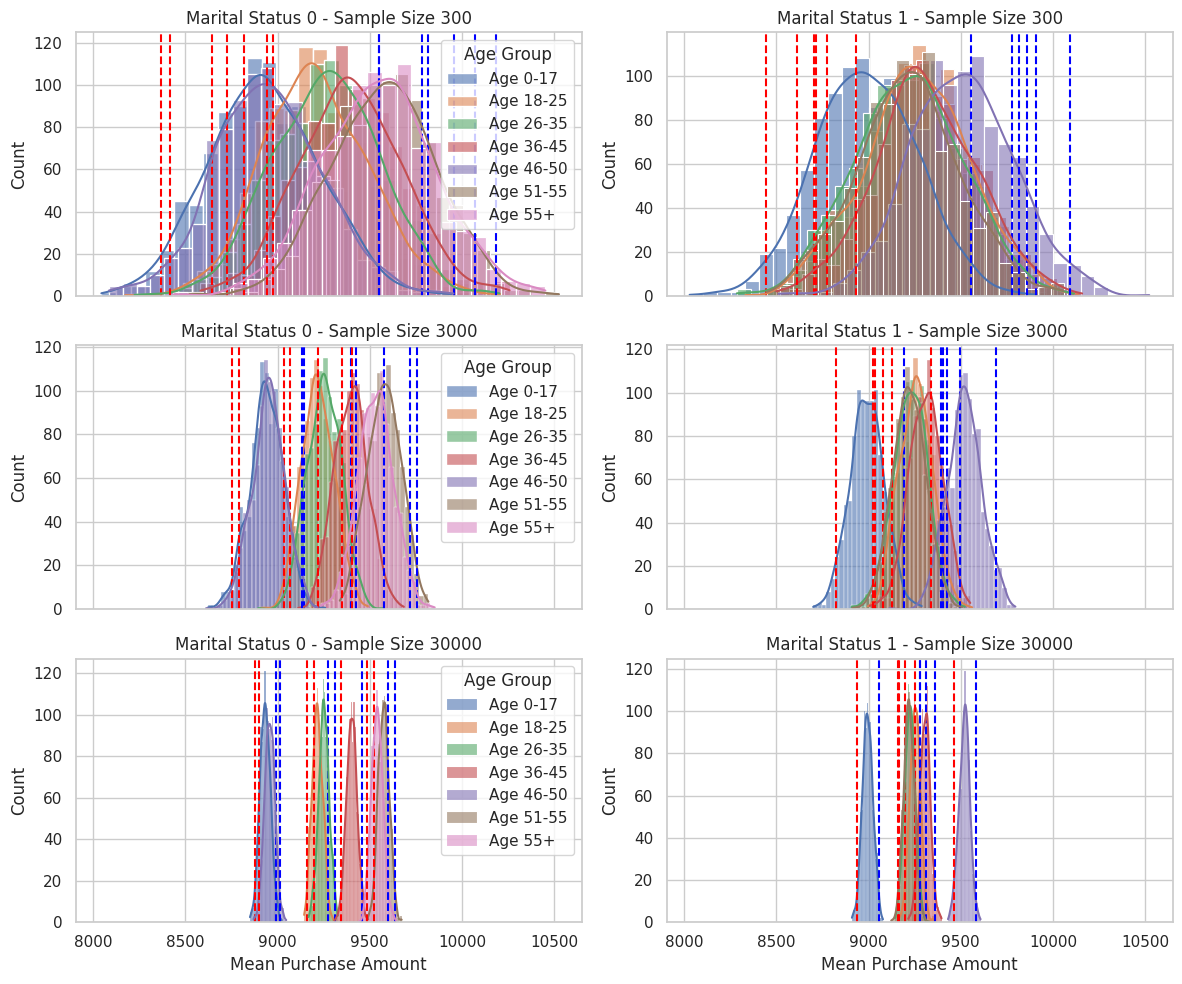

In [ ]:
# Define the layout of the plots
fig, axes = plt.subplots(len(sample_sizes), 2, figsize=(12, 10), sharex=True)

# Loop through each sample size and plot Marital_Status = 0 and Marital_Status = 1 in separate columns
for idx, size in enumerate(sample_sizes):
    for marital_status in [0, 1]:
        col_idx = marital_status  # Set column index for marital status

        # Filter and plot for each age group
        for age_group in age_groups:
            sample_means_key = f'MaritalStatus_{marital_status}_Age_{age_group}_{size}'
            ci_key = f'MaritalStatus_{marital_status}_Age_{age_group}_{size}'

            # Check if data exists for the current combination
            if sample_means_key in sample_means_data and ci_key in ci_results:

                sns.histplot(sample_means_data[sample_means_key], kde=True, ax=axes[idx, col_idx], label=f"Age {age_group}", alpha=0.6)

                # Plot confidence interval lines
                ci_lower, ci_upper = ci_results[ci_key]
                axes[idx, col_idx].axvline(ci_lower, color='red', linestyle='--')
                axes[idx, col_idx].axvline(ci_upper, color='blue', linestyle='--')

        # Set title and label once for each subplot
        axes[idx, col_idx].set_title(f"Marital Status {marital_status} - Sample Size {size}")
        axes[idx, col_idx].set_xlabel("Mean Purchase Amount")

    # Add a single legend for each row
    axes[idx, 0].legend(title="Age Group")

# Final adjustments for layout
plt.tight_layout()
plt.show()


<u><h1><b><font color=#00827F>Insights</b><br><h1></u>
<h5><b><font color=#045D5D>Confidence Interval Width by Gender:<br></b>
In the full dataset, the confidence interval might be wider for one gender if there is more variability in spending in that group. For example, if one gender has more extreme purchase values or larger standard deviations, their confidence interval would be wider, reflecting greater uncertainty in the mean estimate.

<h5><b><font color=#045D5D>Effect of Sample Size on Confidence Interval Width:<br></b>
As sample size increases, the width of the confidence interval decreases. This happens because larger samples provide a more precise estimate of the population mean, reducing the variability of the mean in each bootstrap sample.

<h5><b><font color=#045D5D>Overlap of Confidence Intervals for Different Sample Sizes:<br></b>
Confidence intervals from smaller samples may differ significantly from those of larger samples due to increased variance. However, as sample size grows, intervals should stabilize and may start overlapping, reflecting more accurate estimates.

<h5><b><font color=#045D5D>Sample Size and Shape of Mean Distributions:<br></b>
According to the Central Limit Theorem, as sample size increases, the distribution of the sample means will tend to approximate a normal distribution, even if the underlying data is not normally distributed. Smaller samples might show more skewed or non-normal distributions of means, especially in skewed age or marital status groups, but larger samples will appear more symmetrical.

<u><h1><b><font color=#00827F>Recommendations:</b><br><h1></u>
<h5><b><font color=#045D5D>Targeting Marketing Strategies:<br></b>
For age groups with higher spending levels, tailor marketing strategies based on marital status and age to maximize revenue. Since spending habits appear to vary by marital status, understanding which groups show more variability in spending can help refine targeted strategies.

<h5><b><font color=#045D5D>Optimal Sample Size for Analysis:<br></b>
When studying the population in-depth, a sample size of around 3000-30000 balances precision with computation time, giving reliable confidence intervals without unnecessary computational complexity.

<h5><b><font color=#045D5D>Predictive Modeling for Spending Behavior:<br></b>
Based on the confidence intervals and the CLT insights, consider using predictive modeling for spending patterns among different age and marital status groups to forecast and optimize future campaigns.



<h1><b><font color=#00827F>7. Create a report</b><br><h1>
<h5><b><font color=#045D5D>a. Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?
<br>



In [ ]:
# Calculate mean, std, and sample size for males and females
m, f = df[df['Gender'] == 'M']['Purchase'], df[df['Gender'] == 'F']['Purchase']
z = 1.96  # Z-score for 95% CI

# Confidence intervals
m_ci = (m.mean() - z * (m.std() / len(m)**0.5), m.mean() + z * (m.std() / len(m)**0.5))
f_ci = (f.mean() - z * (f.std() / len(f)**0.5), f.mean() + z * (f.std() / len(f)**0.5))

# Check for overlap
overlap = not (m_ci[1] < f_ci[0] or f_ci[1] < m_ci[0])

# Output results
print(f"Male 95% CI: {m_ci} \nFemale 95% CI: {f_ci} \nOverlap: {overlap}")

Male 95% CI: (9422.019162420047, 9453.032918524483) 
Female 95% CI: (8709.211081242413, 8759.920449068539) 
Overlap: False


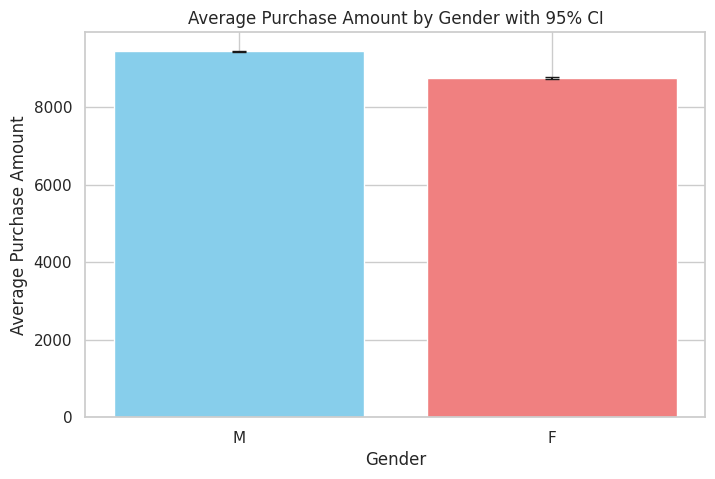

In [ ]:
# Calculate mean and 95% CI for male and female purchases
genders = ['M', 'F']
means = [m.mean(), f.mean()]
errors = [z * (m.std() / np.sqrt(len(m))), z * (f.std() / np.sqrt(len(f)))]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(genders, means, yerr=errors, capsize=5, color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Gender with 95% CI')
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h4><b><font color=#045D5D>Spending Trends by Gender:</b><br>
If the confidence intervals overlap, it suggests that males and females spend similar amounts on average, indicating that both genders could be targeted similarly in terms of promotions and product recommendations.<br><br>
If the confidence intervals do not overlap, it suggests a statistically significant difference in spending behavior between males and females. For instance, if males spend more, they may respond well to premium or high-value product promotions, whereas females might show more interest in other segments.
<br><br>
<h4><b><font color=#045D5D>Implications for Marketing Strategy:<br></b>
No Overlap: Walmart could tailor gender-specific marketing campaigns based on the observed spending patterns, like promoting different products, offers, or discounts targeted at each gender.<br><br>
Overlap: Walmart might focus more on general promotions rather than gender-specific campaigns, ensuring inclusivity and broader reach without differentiating between male and female spending patterns.
<br>
<u><h1><b><font color=#00827F>Recommendations:</b><br><h1></u>
<h5><b><font color=#045D5D>Gender-Specific Promotions:<br></b>
If significant spending differences exist (no overlap), Walmart should consider gender-focused promotions to cater to each gender's specific purchasing power and preferences.<br><br>
Example: If males show higher spending, Walmart could promote electronics or premium items more heavily to male customers. If females show higher spending, marketing could focus on categories where they tend to spend more, such as home goods or beauty products.

<h5><b><font color=#045D5D>Optimized Inventory and Product Selection:<br></b>
Insights from spending patterns can help Walmart optimize inventory. For example, if one gender spends significantly more in specific categories, Walmart can adjust stock levels to meet demand and focus on promoting related items.
<h5><b><font color=#045D5D>Personalized Marketing:<br></b>
If gender differences in spending exist, Walmart can leverage this information for personalized recommendations in their app or website, increasing the relevance of product suggestions based on gender preferences.

<h5><b><font color=#045D5D>Broad Reach Campaigns:<br></b>
If no significant difference is found, Walmart could adopt a unified strategy that doesn’t require segmenting by gender. This would simplify campaigns, potentially lowering marketing costs, and ensuring that both male and female shoppers are reached uniformly.


<h5><b><font color=#045D5D>b. Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?



In [ ]:
# Check the unique values in 'Marital_Status' column
print(df['Marital_Status'].unique())

# If 'Marital_Status' is integer
if df['Marital_Status'].dtype == 'int':
    unmarried_data = df[df['Marital_Status'] == 0]['Purchase']
    married_data = df[df['Marital_Status'] == 1]['Purchase']
else:  # If 'Marital_Status' is string
    unmarried_data = df[df['Marital_Status'] == '0']['Purchase']
    married_data = df[df['Marital_Status'] == '1']['Purchase']

# Continue with the calculations as before
if unmarried_data.empty or married_data.empty:
    print("One of the categories has no data. Please check your data.")
else:
    # Calculate statistics
    unmarried_mean = unmarried_data.mean()
    married_mean = married_data.mean()
    unmarried_std = unmarried_data.std()
    married_std = married_data.std()
    unmarried_sample_size = len(unmarried_data)
    married_sample_size = len(married_data)

    # Z-score for 95% CI
    z = 1.96

    # Calculate confidence intervals
    unmarried_ic_lower = unmarried_mean - z * (unmarried_std / np.sqrt(unmarried_sample_size))
    unmarried_ic_upper = unmarried_mean + z * (unmarried_std / np.sqrt(unmarried_sample_size))
    married_ic_lower = married_mean - z * (married_std / np.sqrt(married_sample_size))
    married_ic_upper = married_mean + z * (married_std / np.sqrt(married_sample_size))

    # Check for overlap
    overlap = not(unmarried_ic_upper < married_ic_lower or married_ic_upper < unmarried_ic_lower)

    print("Unmarried 95% CI:", (unmarried_ic_lower, unmarried_ic_upper))
    print("Married 95% CI:", (married_ic_lower, married_ic_upper))
    print("Do the CIs overlap?", overlap)

    if overlap:
        print("The confidence intervals overlap, suggesting no significant difference in average spending.")
        print("Walmart can consider similar marketing strategies for both groups.")
    else:
        print("The confidence intervals do not overlap, indicating a difference in spending behavior.")
        print("Walmart should consider targeted marketing strategies for married and unmarried customers.")


[0 1]
Unmarried 95% CI: (9248.61610045097, 9283.199137392043)
Married 95% CI: (9240.460046422771, 9281.889101741976)
Do the CIs overlap? True
The confidence intervals overlap, suggesting no significant difference in average spending.
Walmart can consider similar marketing strategies for both groups.


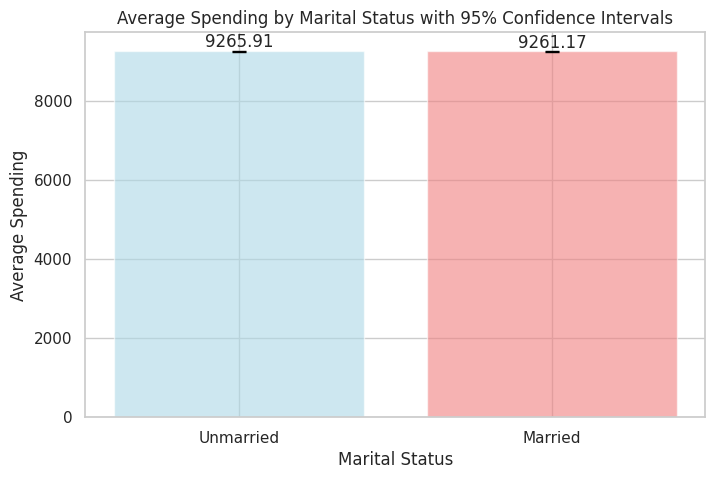

In [ ]:
# Sample data for means, confidence intervals
categories = ['Unmarried', 'Married']
means = [unmarried_mean, married_mean]
lower_bounds = [unmarried_ic_lower, married_ic_lower]
upper_bounds = [unmarried_ic_upper, married_ic_upper]

# Plotting the means with error bars for confidence intervals
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, means, color=['lightblue', 'lightcoral'], alpha=0.6, capsize=10)

# Add error bars for confidence intervals
plt.errorbar(x=categories, y=means,
             yerr=[np.array(means) - np.array(lower_bounds),
                    np.array(upper_bounds) - np.array(means)],
             fmt='none', c='black', capsize=5)

# Adding labels and title
plt.title('Average Spending by Marital Status with 95% Confidence Intervals')
plt.ylabel('Average Spending')
plt.xlabel('Marital Status')

# Add labels on the bars
for bar, mean in zip(bars, means):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{mean:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h4><b><font color=#045D5D>Spending Differences by Marital Status:<br></b>
If the confidence intervals overlap, it suggests that the average spending between married and unmarried individuals is not significantly different. This would imply that marital status does not play a substantial role in influencing the amount spent by customers at Walmart.<br><br>
If the confidence intervals do not overlap, it suggests a statistically significant difference in spending behavior between married and unmarried individuals, indicating that Walmart may benefit from understanding and targeting these two groups differently.

<h3><b><font color=#045D5D>Implications for Marketing and Inventory:</h3></b><h5>
Overlap: If married and unmarried customers spend similarly, Walmart can apply broad, inclusive marketing campaigns that appeal to both groups without specific segmentation by marital status.<br><br>
No Overlap: If there is a clear difference in spending between the two groups, Walmart could leverage this information for targeted marketing. For example, married customers might be more likely to respond to family-oriented product promotions, whereas unmarried customers might respond better to individual convenience items or smaller package sizes.

<u><h1><b><font color=#00827F>Recommendations:</b><br><h1></u>
<h3><b><font color=#045D5D>Personalized Marketing:</h3></b><h5>
If a spending gap exists, Walmart could develop tailored promotions for each group. For instance, targeting married customers with promotions on household items, bulk purchases, and family-centric products, while promoting single-serving options, convenience products, and lifestyle items to unmarried customers.

<h3><b><font color=#045D5D>Product Placement and Inventory Optimization:</h3></b><h5>
For stores in areas where one group is predominant, Walmart can adjust inventory and product placement based on the identified spending trends of that group. For example, in family-dense areas, Walmart could stock more family-size packages and household items, while in areas with higher single populations, it might prioritize products for individual use and convenience.

<h3><b><font color=#045D5D>Enhanced Customer Experience:</h3></b><h5>
By leveraging insights into spending behavior, Walmart can further personalize shopping experiences both online and in-store, possibly integrating tailored product recommendations, exclusive deals, and marketing content that speaks to the unique needs and preferences of each marital status group.

<h5><b><font color=#045D5D>c. Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?



In [ ]:
# Calculate mean, std, and count for each age group
age_group_stats = df.groupby('Age')['Purchase'].agg(['mean', 'std', 'count'])

# Calculate the 95% confidence intervals
z_score = stats.norm.ppf(0.975)
age_group_stats['margin_of_error'] = z_score * (age_group_stats['std'] / np.sqrt(age_group_stats['count']))
age_group_stats['CI_lower'] = age_group_stats['mean'] - age_group_stats['margin_of_error']
age_group_stats['CI_upper'] = age_group_stats['mean'] + age_group_stats['margin_of_error']

# Check for overlap
for i in range(len(age_group_stats) - 1):
    overlap = age_group_stats['CI_upper'].iloc[i] >= age_group_stats['CI_lower'].iloc[i + 1]
    print(f"Age group {age_group_stats.index[i]} and {age_group_stats.index[i + 1]} overlap: {overlap}")
print(age_group_stats[['mean', 'CI_lower', 'CI_upper']])

Age group 0-17 and 18-25 overlap: False
Age group 18-25 and 26-35 overlap: False
Age group 26-35 and 36-45 overlap: False
Age group 36-45 and 46-50 overlap: True
Age group 46-50 and 51-55 overlap: False
Age group 51-55 and 55+ overlap: True
              mean     CI_lower     CI_upper
Age                                         
0-17   8933.464640  8851.947971  9014.981310
18-25  9169.663606  9138.407949  9200.919264
26-35  9252.690633  9231.733676  9273.647589
36-45  9331.350695  9301.669411  9361.031979
46-50  9208.625697  9163.085143  9254.166252
51-55  9534.808031  9483.991473  9585.624589
55+    9336.280459  9269.298834  9403.262084


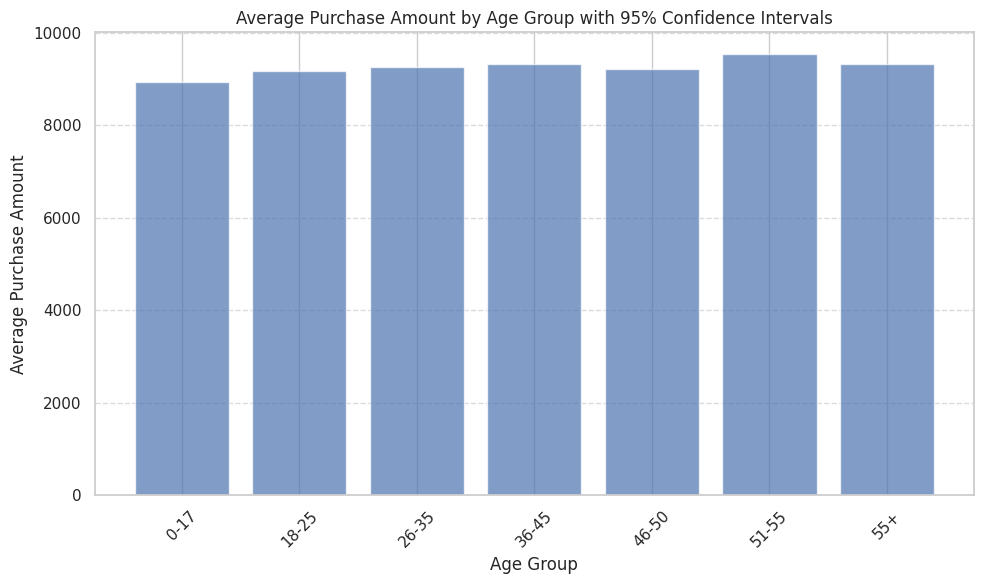

In [ ]:
# Plotting the confidence intervals
plt.figure(figsize=(10, 6))
plt.bar(age_group_stats.index, age_group_stats['mean'], alpha=0.7)
plt.xticks(rotation=45)
plt.title('Average Purchase Amount by Age Group with 95% Confidence Intervals')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<u><h1><b><font color=#00827F>Insights:</b><br><h1></u>
<h3><b><font color=#045D5D>Spending Trends Across Age Groups:</h3></b><h5>
If confidence intervals overlap between age groups, it suggests that the spending behavior is similar across those groups, indicating no significant difference in average spending based on age. In this case, age may not be a key determinant of spending patterns at Walmart.<br><br>
If confidence intervals do not overlap, this indicates distinct spending behaviors across certain age groups, suggesting that age does play a role in purchase behavior, with some age groups potentially spending more or less than others.
<h3><b><font color=#045D5D>Implications for Targeted Marketing:</h3></b><h5>
Overlap: If there is no significant difference in spending across age groups, Walmart could consider broader marketing strategies that do not focus specifically on age, such as general discount campaigns or store-wide promotions that appeal to a wide audience.<br><br>
No Overlap: If distinct spending patterns exist among age groups, Walmart can create more age-specific marketing strategies. For example, younger age groups might respond well to promotions on trendy or tech-related products, while older age groups may prefer promotions on necessities or household items.

<h3><b><font color=#045D5D>Personalization Opportunities:</h3></b><h5>
<b>Higher Spending Age Groups:</b> Walmart could offer loyalty rewards or personalized discounts for age groups that tend to spend more, encouraging them to continue shopping and increasing brand loyalty.<br><br>
<b>Engagement with Lower Spending Groups:</b> For age groups that tend to spend less, Walmart might consider special deals, promotions, or bundled offers to encourage higher spending and drive interest in specific products.

<u><h1><b><font color=#00827F>Recommendations:</b><br><h1></u>
<h3><b><font color=#045D5D>Marketing Strategies by Age:</h3></b><h5>
For groups with distinct spending behaviors, tailor promotions and advertising to their unique preferences. For example, if younger groups spend less, attract them with discount offers on products that appeal to their lifestyle, such as electronics or fashion. If older groups have higher average spending, focus on value-based promotions on household essentials and family-related items.

<h3><b><font color=#045D5D>Customized Product Offerings:</h3></b><h5>
Adjust product inventory and offerings based on the age demographics of specific store locations. For example, stores in areas with a higher proportion of younger shoppers might stock more trend-oriented items, while stores with older demographics may benefit from a wider selection of household and health products.
<h3><b><font color=#045D5D>Enhanced Customer Engagement:</h3></b><h5>
If certain age groups show higher spending, Walmart can leverage this by implementing age-targeted loyalty programs or discounts to build customer loyalty and encourage repeat visits, enhancing both the shopping experience and customer satisfaction.
